### **Easy Visa Dataset EXploratory Data Analysis**

**Phase 2: Exploratory Data Analysis (EDA)**

Task 2.1: Conduct exploratory data analysis to understand the distribution of features and the target variable .

In [24]:
# importing necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
#  loading the dataset
def load_data():
    #Loading the dataset into a Pandas DataFrame.
    df = pd.read_csv("visa_cleaned.csv")
    print("Data Loaded Successfully")
    return df

In [26]:
# calling the function to load the data
df_visa = load_data()
# previeving the first 5 rows of the dataset
df_visa.head()

Data Loaded Successfully


,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [27]:
# checking the dataset for missing values
def missing_values():
     # checking the columns in the dataset
    df_visa_columns = df_visa.columns
    for col in df_visa_columns:
        missing_value_count = df_visa[col].isna().sum()
        print(f"{col} : {missing_value_count}")
missing_values()  

continent : 0
education_of_employee : 0
has_job_experience : 0
requires_job_training : 0
no_of_employees : 0
yr_of_estab : 0
region_of_employment : 0
prevailing_wage : 0
unit_of_wage : 0
full_time_position : 0
case_status : 0


In [28]:
# extracting the numerical columns
num_cols = [x for x in df_visa.select_dtypes(include=["int64", "float64"]).columns] 
num_cols


['no_of_employees', 'yr_of_estab', 'prevailing_wage']

In [29]:
# extracting the categorical columns
cat_cols = [x for x in df_visa.select_dtypes(include=["object"]).columns]
cat_cols

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [38]:
# def handle_eda
def univariate_numerical_eda(df, column):
    """Performing Univariate Analysis on each Numerical Columns
    Display statistical summary using skewness, kurtosis, boxplots, histogram
    """
    print(f'Feature: {column}')
    print(f"="* 40)
    
    print(df[column].describe().to_frame())
    print(f"Skewness: {df[column].skew():.3f}") #checking the skewness
    print(f"Kurtosis: {df[column].kurt():.3f}") #checking the kurtosis


    # visualization
    plt.figure(figsize=(12,6))
    plt.subplot(1, 2,1)
    # histogram + KDE
    sns.histplot(df[column], kde=True, bins=30, color='#4C72B0')
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {column}", fontsize = 14)
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column], color='#DD8452')
    plt.title(f"Boxplot of {column}", fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # Skewness Analysis
    if abs(df[column].skew()) > 1:
        print(f"{df[column]} is Highly Skewed, Apply Log Transformation or Box Cox")
    elif abs(df[column].skew()>0.5):
        print(f"{df[column]} is Moderately Skewed") 
    else:
        print(f"{df[column]} is Fairly Skewed")       

Feature: no_of_employees
       no_of_employees
count     25480.000000
mean       5667.043210
std       22877.928848
min         -26.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      602069.000000
Skewness: 12.265
Kurtosis: 206.335


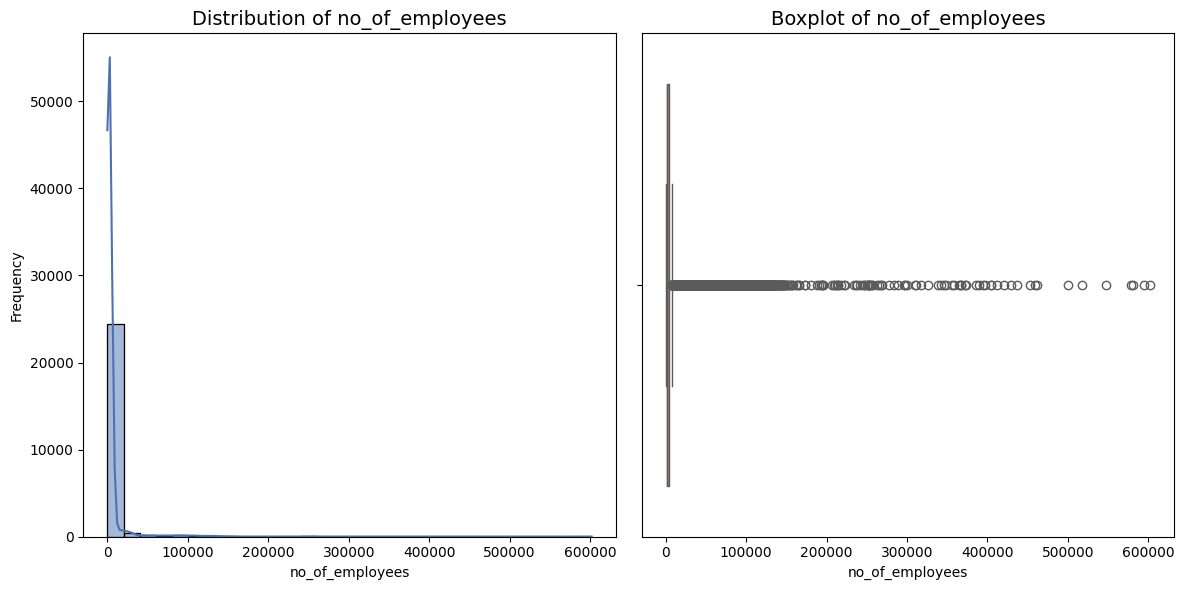

0        14513
1         2412
2        44444
3           98
4         1082
         ...  
25475     2601
25476     3274
25477     1121
25478     1918
25479     3195
Name: no_of_employees, Length: 25480, dtype: int64 is Highly Skewed, Apply Log Transformation or Box Cox
Feature: yr_of_estab
        yr_of_estab
count  25480.000000
mean    1979.409929
std       42.366929
min     1800.000000
25%     1976.000000
50%     1997.000000
75%     2005.000000
max     2016.000000
Skewness: -2.037
Kurtosis: 3.507


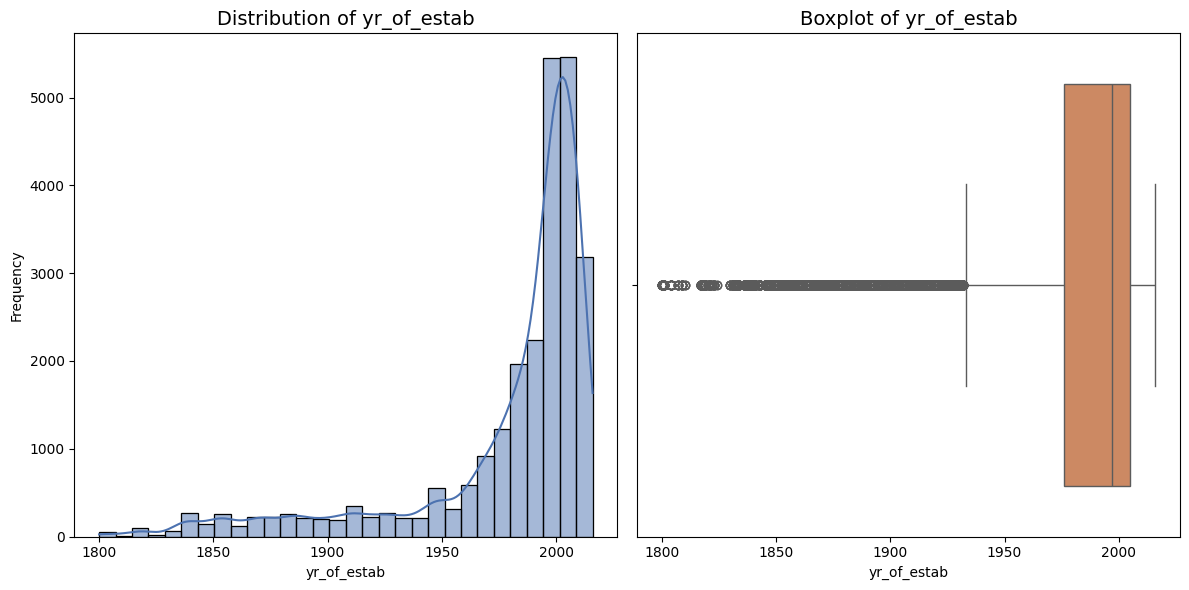

0        2007
1        2002
2        2008
3        1897
4        2005
         ... 
25475    2008
25476    2006
25477    1910
25478    1887
25479    1960
Name: yr_of_estab, Length: 25480, dtype: int64 is Highly Skewed, Apply Log Transformation or Box Cox
Feature: prevailing_wage
       prevailing_wage
count     25480.000000
mean      74455.814592
std       52815.942327
min           2.136700
25%       34015.480000
50%       70308.210000
75%      107735.512500
max      319210.270000
Skewness: 0.756
Kurtosis: 0.824


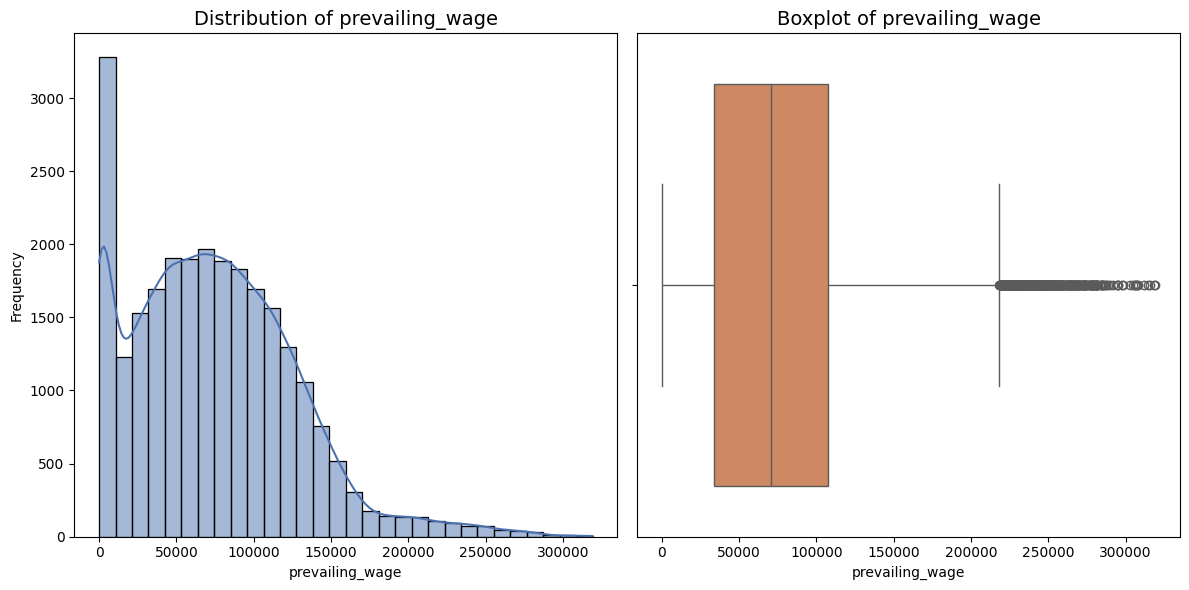

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64 is Moderately Skewed


In [39]:
for col in num_cols:
    univariate_numerical_eda(df_visa, col)

In [59]:
def univariate_categorical_eda(df,column):
    """
    Performing univariate EDA on a Categorical or ordinal column.
    Displays frequency table, proportion and a countplot
    """
    print(f"Feature: {column}")
    print("=" *40)
    freq=df[column].value_counts()
    prop=df[column].value_counts(normalize=True)*100
    summary = pd.DataFrame({'Frequency': freq, 'Proportion (%)': prop.round(2)})
    print(summary)
    
    plt.figure(figsize=(12,6))
    
    # Visualizations(Bar Chart)
    # plt.subplot(1, 2, 1)
    ax = sns.countplot(x=column,data=df, order=freq.index, color="purple", palette="Set2")
    plt.title(f"Frequency Distribution of {column}", fontsize=14)
    plt.ylabel("Frequency")
    plt.xlabel(column)
    # plt.xticks(rotation=45)
    
    # Visualizations(Pie Chart)
    # plt.subplot(1, 2, 2)
    # plt.pie(prop, labels=freq.index, autopct="%1.1f%%", startangle=90, colors=sns.color_palette("Set2"))
    # plt.title(f"Pie Chart of {column}", fontsize=14)
    # plt.axis("equal")

    
    # annotate each bar with percentage
    total = len(df[column])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+ p.get_width()/2, height+1, f"{(height/total)*100:.1f}", ha="center")
    plt.tight_layout()
    plt.show()
    
    

Feature: continent
               Frequency  Proportion (%)
continent                               
Asia               16861           66.17
Europe              3732           14.65
North America       3292           12.92
South America        852            3.34
Africa               551            2.16
Oceania              192            0.75


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_1556\3429182412.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column,data=df, order=freq.index, color="purple", palette="Set2")


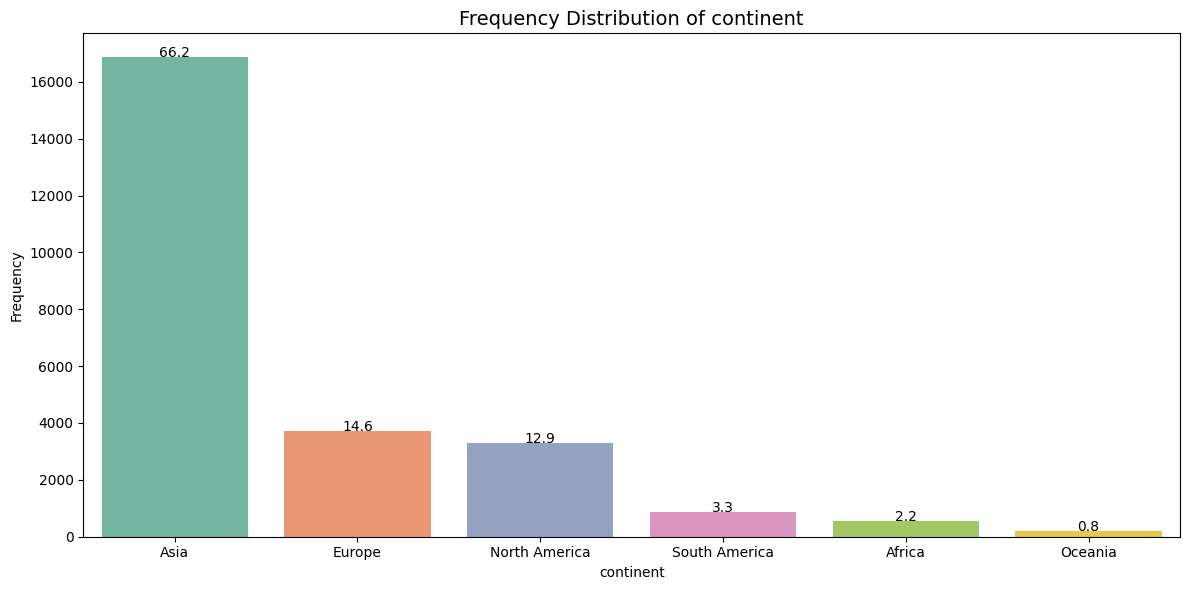

Feature: education_of_employee
                       Frequency  Proportion (%)
education_of_employee                           
Bachelor's                 10234           40.16
Master's                    9634           37.81
High School                 3420           13.42
Doctorate                   2192            8.60


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_1556\3429182412.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column,data=df, order=freq.index, color="purple", palette="Set2")


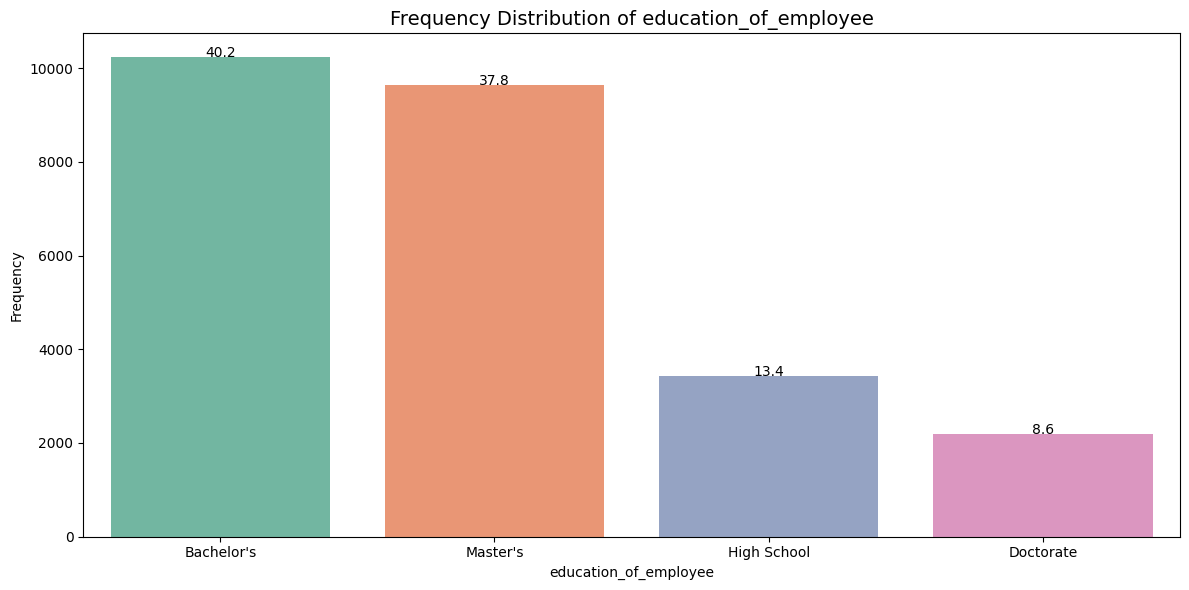

Feature: has_job_experience
                    Frequency  Proportion (%)
has_job_experience                           
Y                       14802           58.09
N                       10678           41.91


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_1556\3429182412.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column,data=df, order=freq.index, color="purple", palette="Set2")


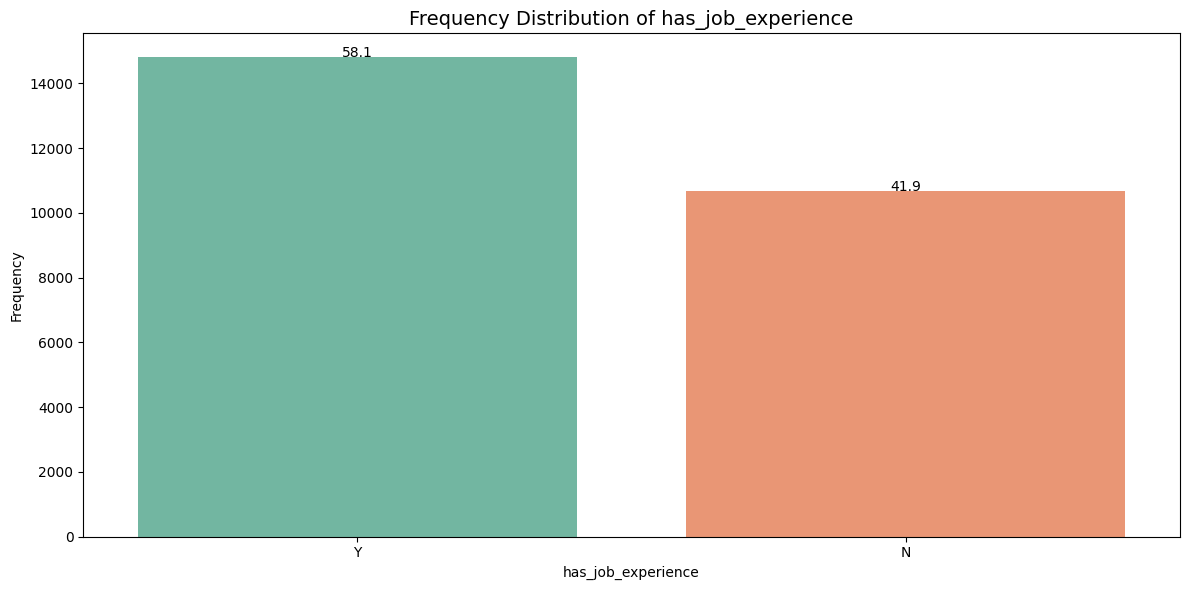

Feature: requires_job_training
                       Frequency  Proportion (%)
requires_job_training                           
N                          22525            88.4
Y                           2955            11.6


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_1556\3429182412.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column,data=df, order=freq.index, color="purple", palette="Set2")


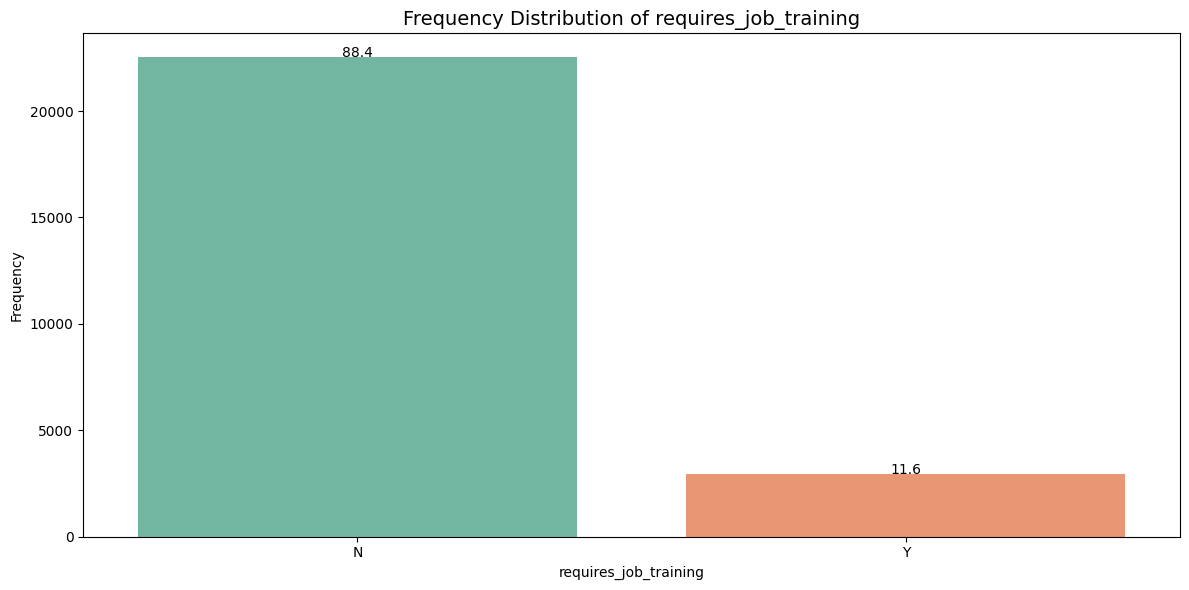

Feature: region_of_employment
                      Frequency  Proportion (%)
region_of_employment                           
Northeast                  7195           28.24
South                      7017           27.54
West                       6586           25.85
Midwest                    4307           16.90
Island                      375            1.47


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_1556\3429182412.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column,data=df, order=freq.index, color="purple", palette="Set2")


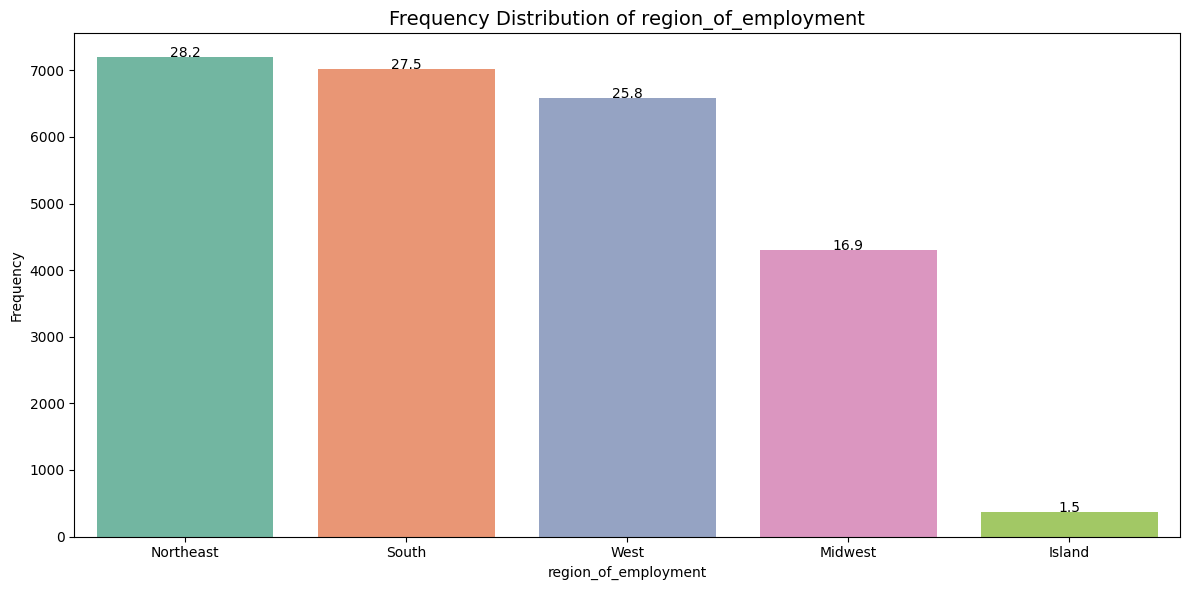

Feature: unit_of_wage
              Frequency  Proportion (%)
unit_of_wage                           
Year              22962           90.12
Hour               2157            8.47
Week                272            1.07
Month                89            0.35


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_1556\3429182412.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column,data=df, order=freq.index, color="purple", palette="Set2")


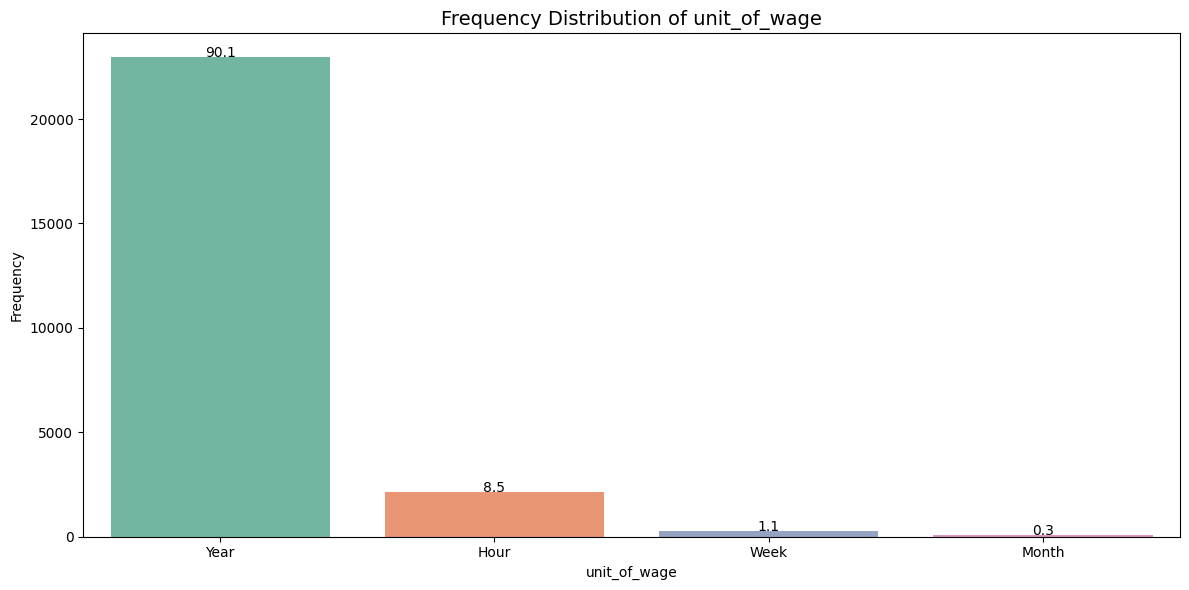

Feature: full_time_position
                    Frequency  Proportion (%)
full_time_position                           
Y                       22773           89.38
N                        2707           10.62


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_1556\3429182412.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column,data=df, order=freq.index, color="purple", palette="Set2")


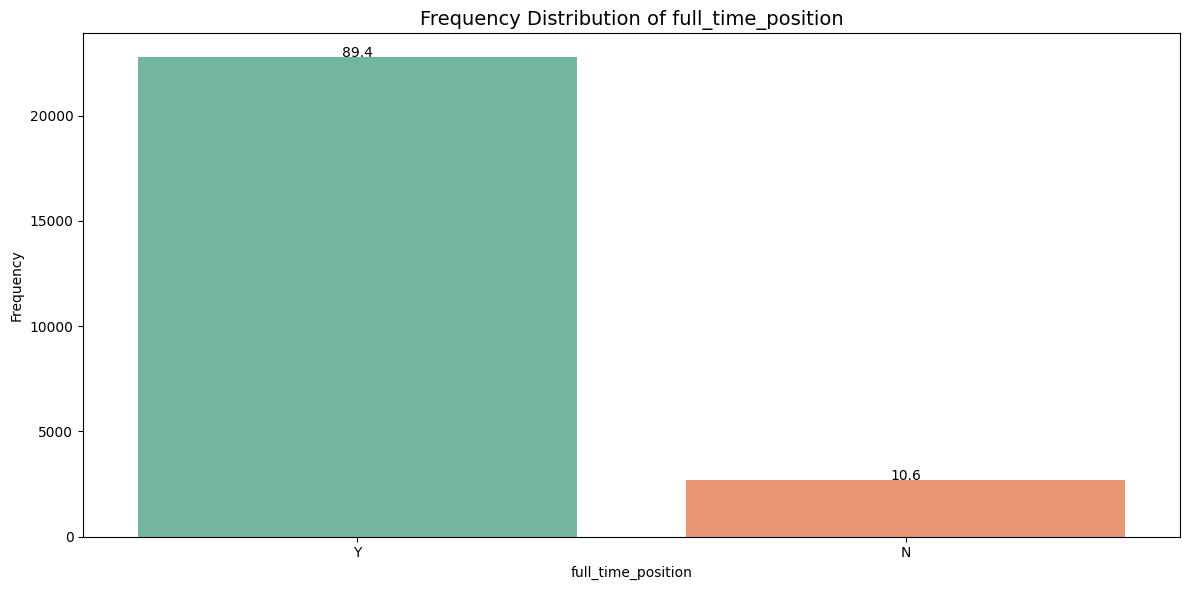

Feature: case_status
             Frequency  Proportion (%)
case_status                           
Certified        17018           66.79
Denied            8462           33.21


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_1556\3429182412.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column,data=df, order=freq.index, color="purple", palette="Set2")


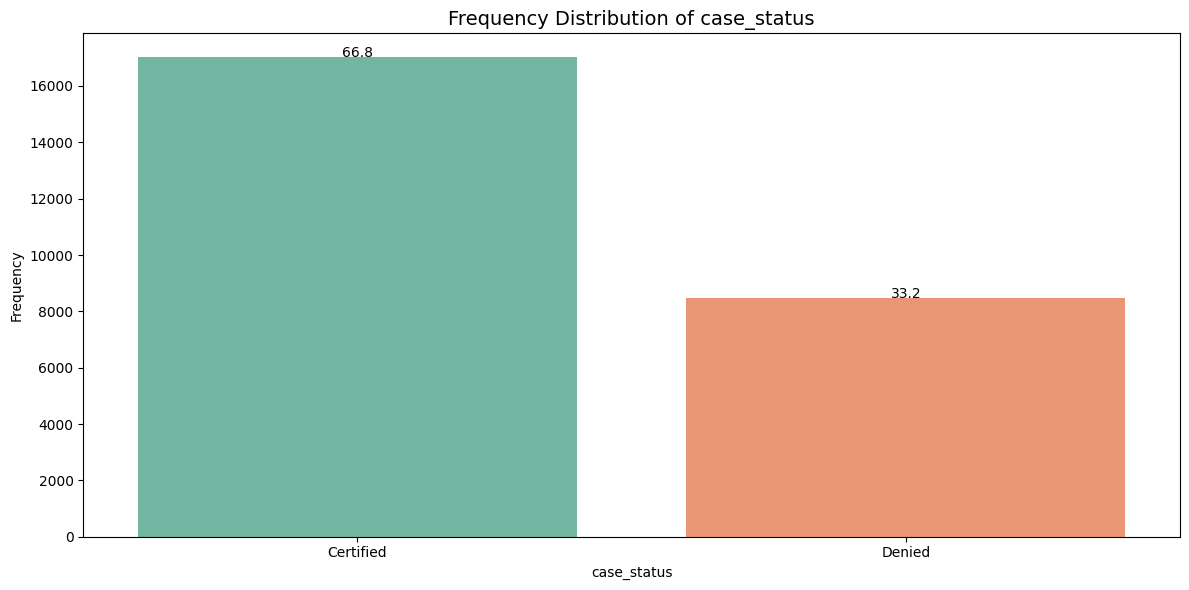

In [60]:
for col in cat_cols:
    univariate_categorical_eda(df_visa, col)

### **Bivariate Analysis**

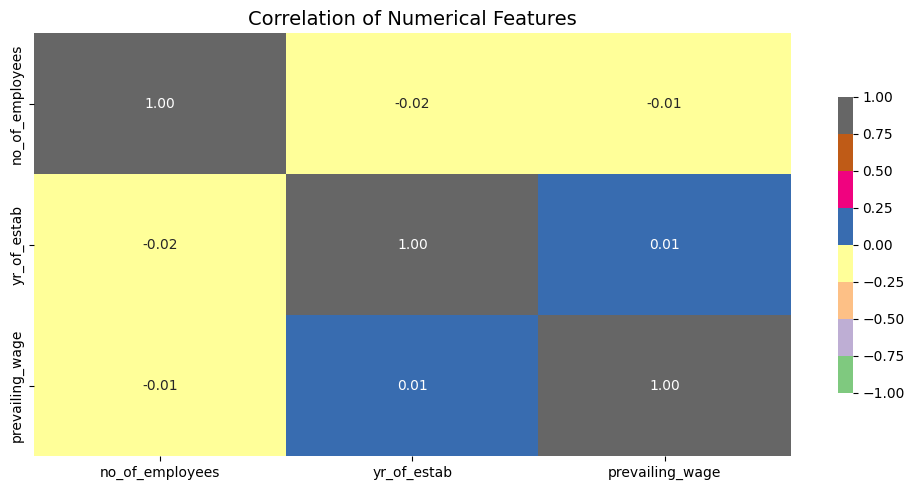

In [69]:
# cols_list= num_cols.tolist()
cols_list = df_visa.select_dtypes(include=np.number).columns.tolist()

def numeric_correlation():
    plt.figure(figsize=(10, 5))
    sns.heatmap(df_visa[cols_list].corr(), annot=True,vmin=-1,vmax=1, fmt=".2f", cmap='Accent', center=0, cbar_kws ={"orientation":"vertical", "shrink":0.7})
    plt.title(f"Correlation of Numerical Features" , fontsize=14)
    plt.tight_layout()
    plt.show()
numeric_correlation()    

In [65]:
# corr_series = correlation_with_target(df_visa,"case_status")

In [83]:
def distribution_plot_wrt_target(df, predictor, target):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    target_uniq = df[target].unique()
    
    axs[0,0].set_title("Distribution of Numerical with target =" + str(target_uniq[0]))
    sns.histplot(data=df[df[target] == target_uniq[0]], ax=axs[0,0], color='teal', stat="density") 
       
    axs[0,1].set_title("Distribution of Numerical with target =" + str(target_uniq[1]))
    sns.histplot(data=df[df[target] == target_uniq[1]], x=predictor, kde=True, ax=axs[0,1], palette='gist_rainbow', stat="density")
    
    axs[1,0].set_title("Boxplot w.r.t target")
    sns.boxplot(x=target, y=predictor, data=df, ax=axs[1,0], palette="Set2") 
    
    axs[1,1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(x=target, y=predictor, data=df, ax=axs[1,1],showfliers=False, palette="gist_rainbow")
    
    plt.tight_layout()
    plt.show()
       
        

C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_1556\783377094.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df[df[target] == target_uniq[1]], x=predictor, kde=True, ax=axs[0,1], palette='gist_rainbow', stat="density")
C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_1556\783377094.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=predictor, data=df, ax=axs[1,0], palette="Set2")
C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_1556\783377094.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=predictor, data=df, ax=axs[1,1],showfliers=False, palette="gist_rainbow")


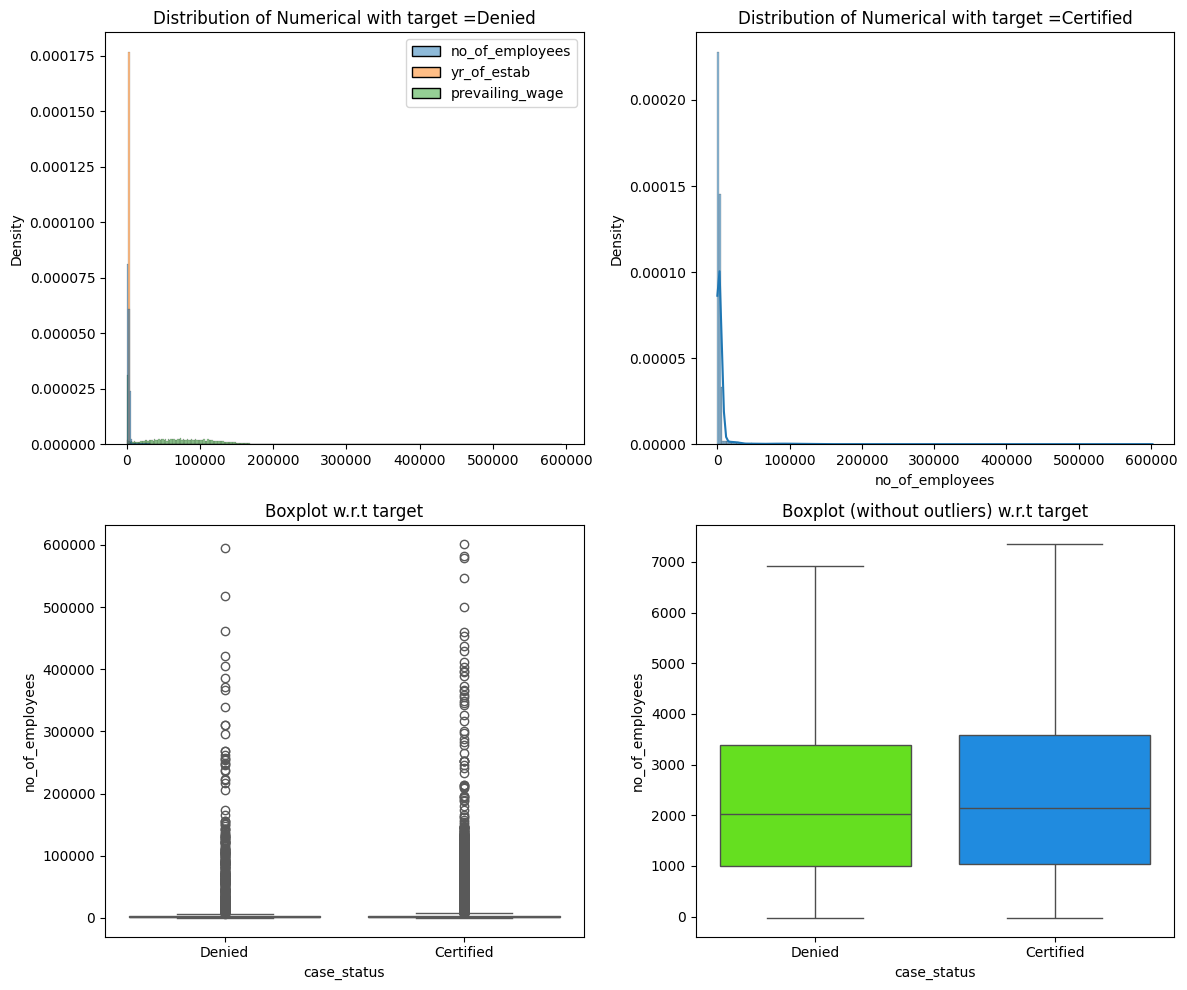

C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_1556\783377094.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df[df[target] == target_uniq[1]], x=predictor, kde=True, ax=axs[0,1], palette='gist_rainbow', stat="density")
C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_1556\783377094.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=predictor, data=df, ax=axs[1,0], palette="Set2")
C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_1556\783377094.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=predictor, data=df, ax=axs[1,1],showfliers=False, palette="gist_rainbow")


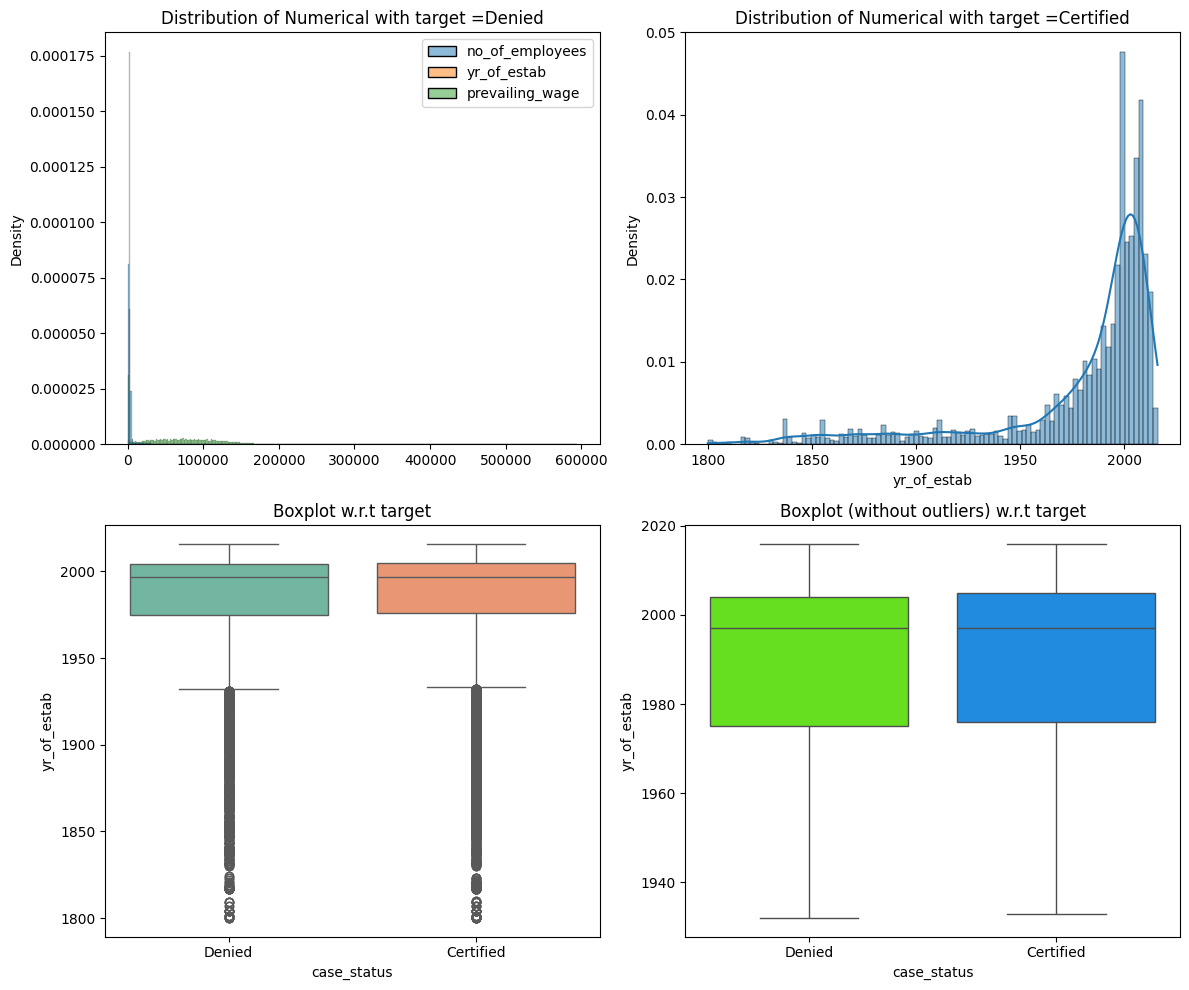

C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_1556\783377094.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df[df[target] == target_uniq[1]], x=predictor, kde=True, ax=axs[0,1], palette='gist_rainbow', stat="density")
C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_1556\783377094.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=predictor, data=df, ax=axs[1,0], palette="Set2")
C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_1556\783377094.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=predictor, data=df, ax=axs[1,1],showfliers=False, palette="gist_rainbow")


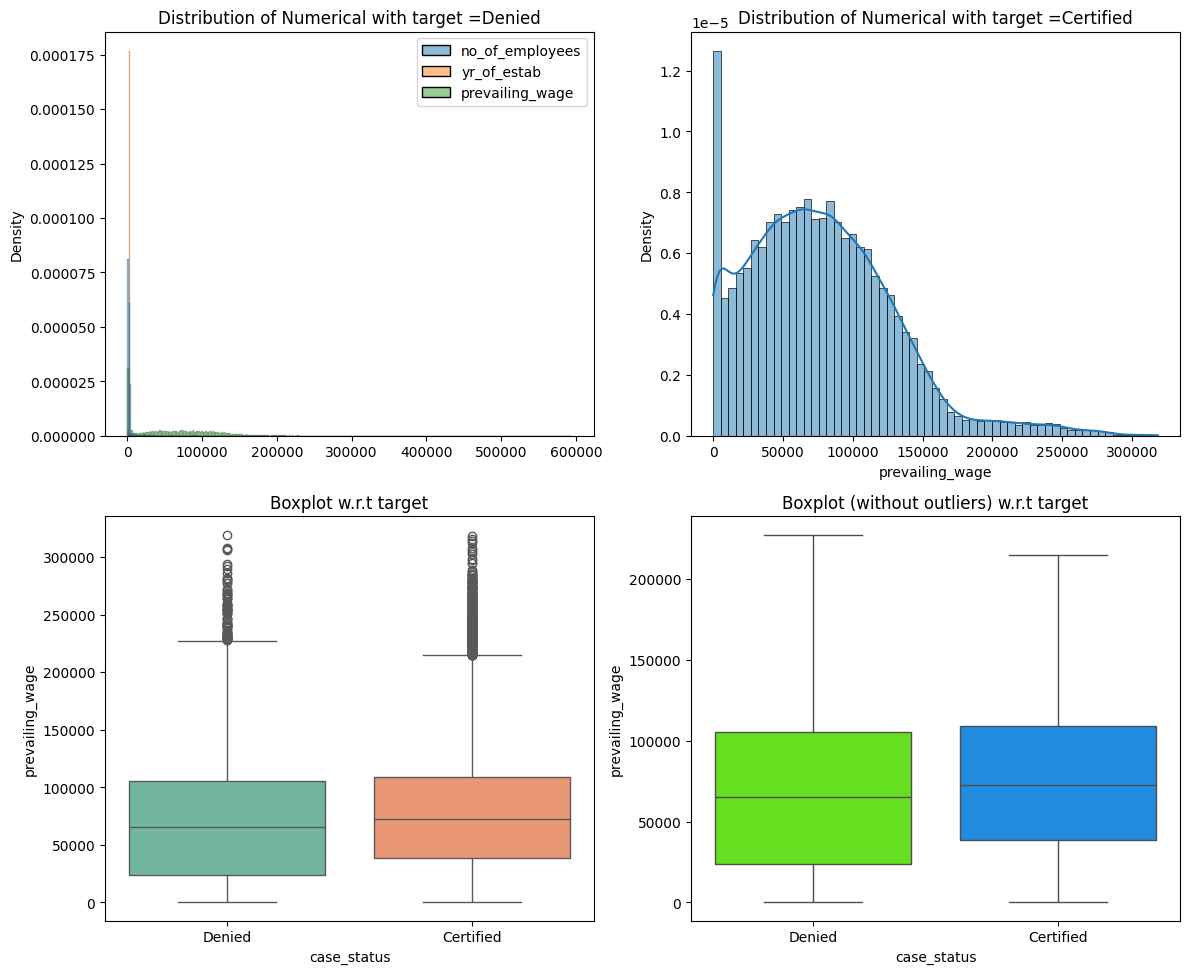

In [84]:
for col in num_cols:
    distribution_plot_wrt_target(df_visa, col, "case_status")

In [ ]:
def categorical_plot_wrt_target(data, predictor, target):
    """
    Visualize the relationship between a categorical predictor and a categorical target
    using multiple plot types for better insight.
    This function produces a 2x2 grid of subplots:
        1. Count plot (frequency of predictor categories across target classes)
        2. Normalized stacked bar plot (percentage distribution)
        3. Heatmap of raw counts
        4. Heatmap of percentage distribution
    Parameters
    data : pandas.DataFrame
        The dataset containing the predictor and target columns.
    predictor : str
        The name of the categorical predictor variable.
    target : str
        The name of the categorical target variable.
    Returns
    None
        The function displays visualizations and does not return a value.
    """
    # Set the overall figure size for all subplots (width=14, height=10)
    plt.figure(figsize=(14, 10))
    # COUNT PLOT -
    # Create the first subplot (top-left position)
    plt.subplot(2, 2, 1)
    # Draw a count plot showing how the predictor categories are distributed across each target class (using hue for color separation)
    sns.countplot(data=data, x=predictor, hue=target, palette="Set2")
    # Set the title of the first subplot
    plt.title(f"Count of {predictor} by {target}")
    # Label the x-axis and y-axis
    plt.xlabel(predictor)
    plt.ylabel("Count")
    # Add a legend showing the target categories
    plt.legend(title=target)
    
    
    #NORMALIZED (PERCENTAGE) STACKED BAR PLOT
    # Create the second subplot (top-right position)
    plt.subplot(2, 2, 2)
    # Create a crosstab to show how target categories are distributed
    # within each predictor category (normalized by rows to get percentages)
    cross_tab = pd.crosstab(data[predictor], data[target], normalize='index') * 100
    # Plot the normalized crosstab as a stacked bar chart
    cross_tab.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='Set3')
    # Add title and axis labels
    plt.title(f"Percentage distribution of {target} within each {predictor}")
    plt.ylabel("Percentage (%)")
    plt.xlabel(predictor)
    # Move the legend slightly outside the plot for better visibility
    plt.legend(title=target, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    
    # HEATMAP OF RAW COUNTS 
    # Create the third subplot (bottom-left position)
    plt.subplot(2, 2, 3)
    # Create a crosstab of raw counts between predictor and target
    cross_tab_counts = pd.crosstab(data[predictor], data[target])
    # Draw a heatmap to visualize the count values between predictor and target
    sns.heatmap(cross_tab_counts, annot=True, fmt='d', cmap="coolwarm")
    # Set the title and axis labels for this heatmap
    plt.title(f"Heatmap of {predictor} vs {target} (counts)")
    plt.xlabel(target)
    plt.ylabel(predictor)
    
    # HEATMAP OF PERCENTAGES 
    # Create the fourth subplot (bottom-right position)
    plt.subplot(2, 2, 4)
    # Draw another heatmap using the percentage crosstab
    # Annotate each cell with percentage values (1 decimal place)
    sns.heatmap(cross_tab, annot=True, fmt=".1f", cmap="YlGnBu")
    # Set the title and axis labels for the percentage heatmap
    plt.title(f"Heatmap of {predictor} vs {target} (percentage)")
    plt.xlabel(target)
    plt.ylabel(predictor)
    plt.tight_layout()   # Adjust layout to prevent overlap between titles, labels, and subplots
    plt.show()    # Display all plots on the screen

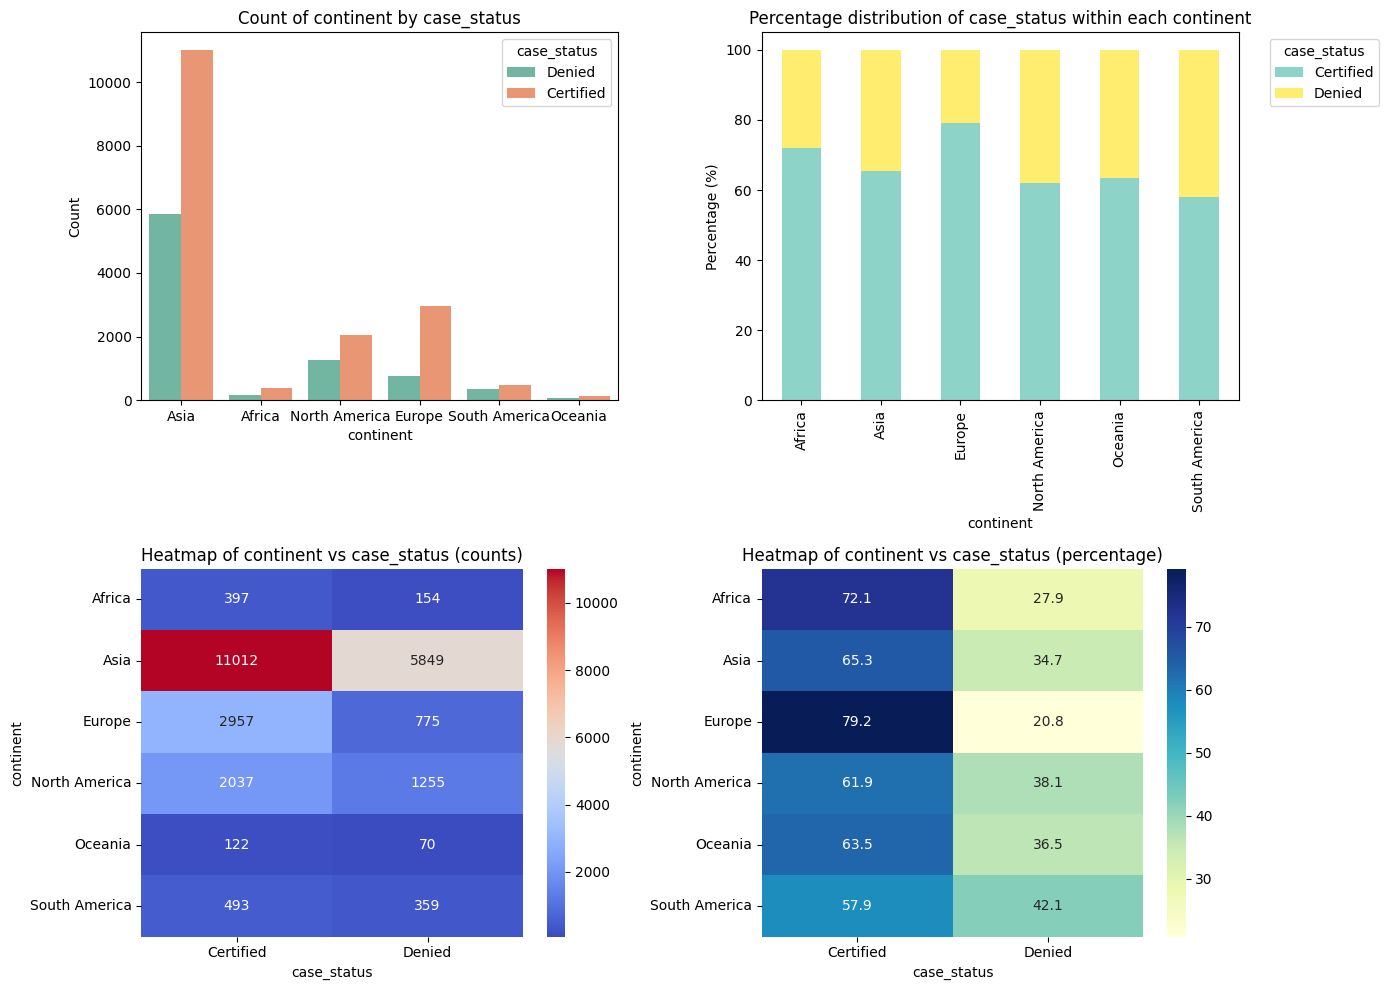

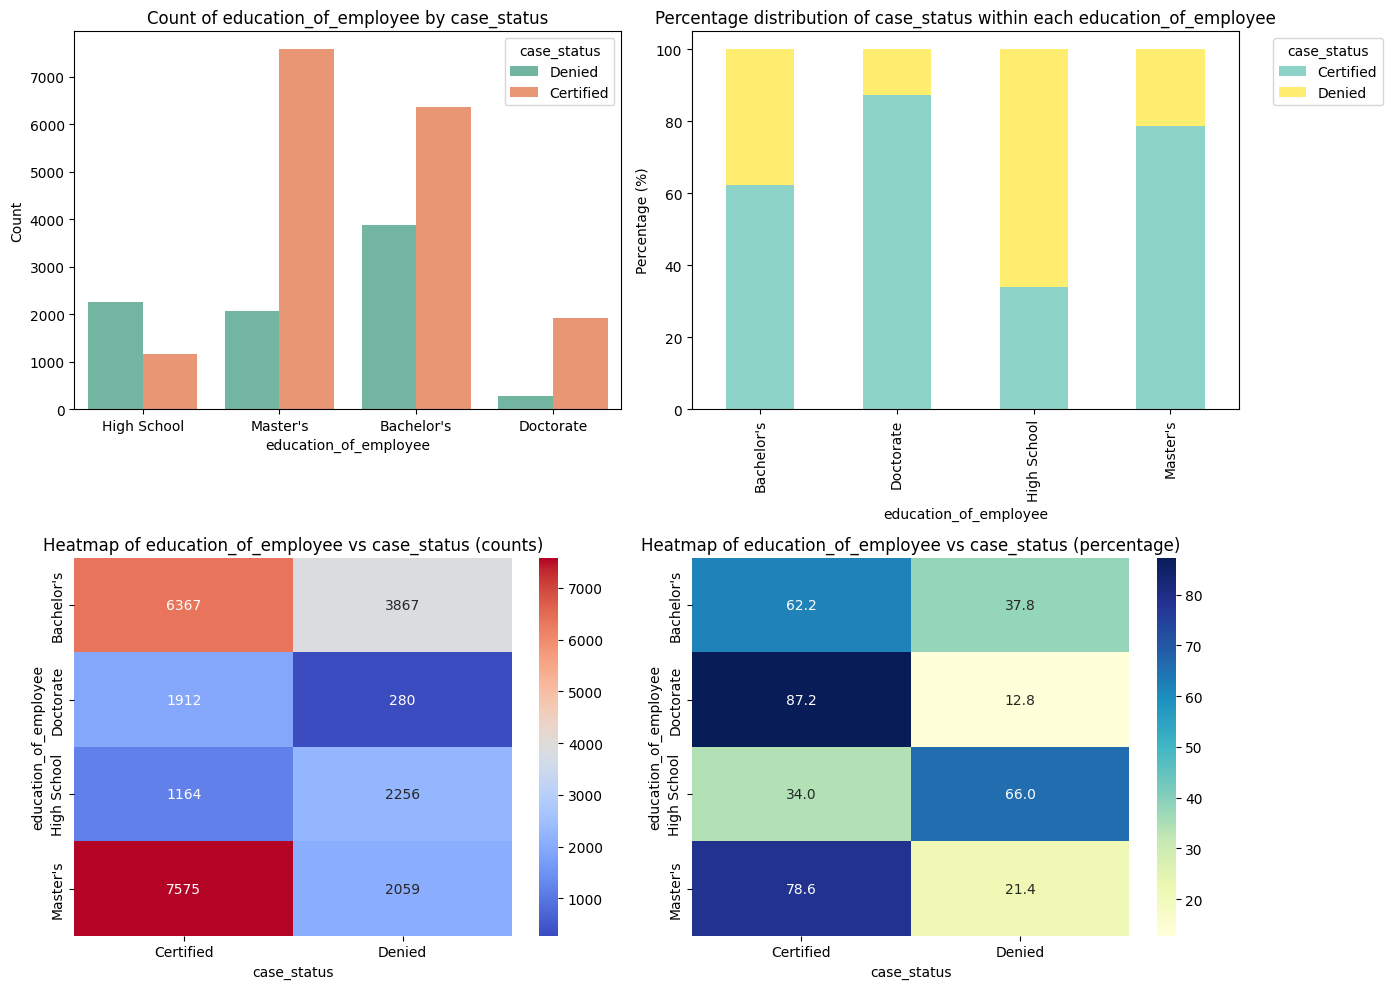

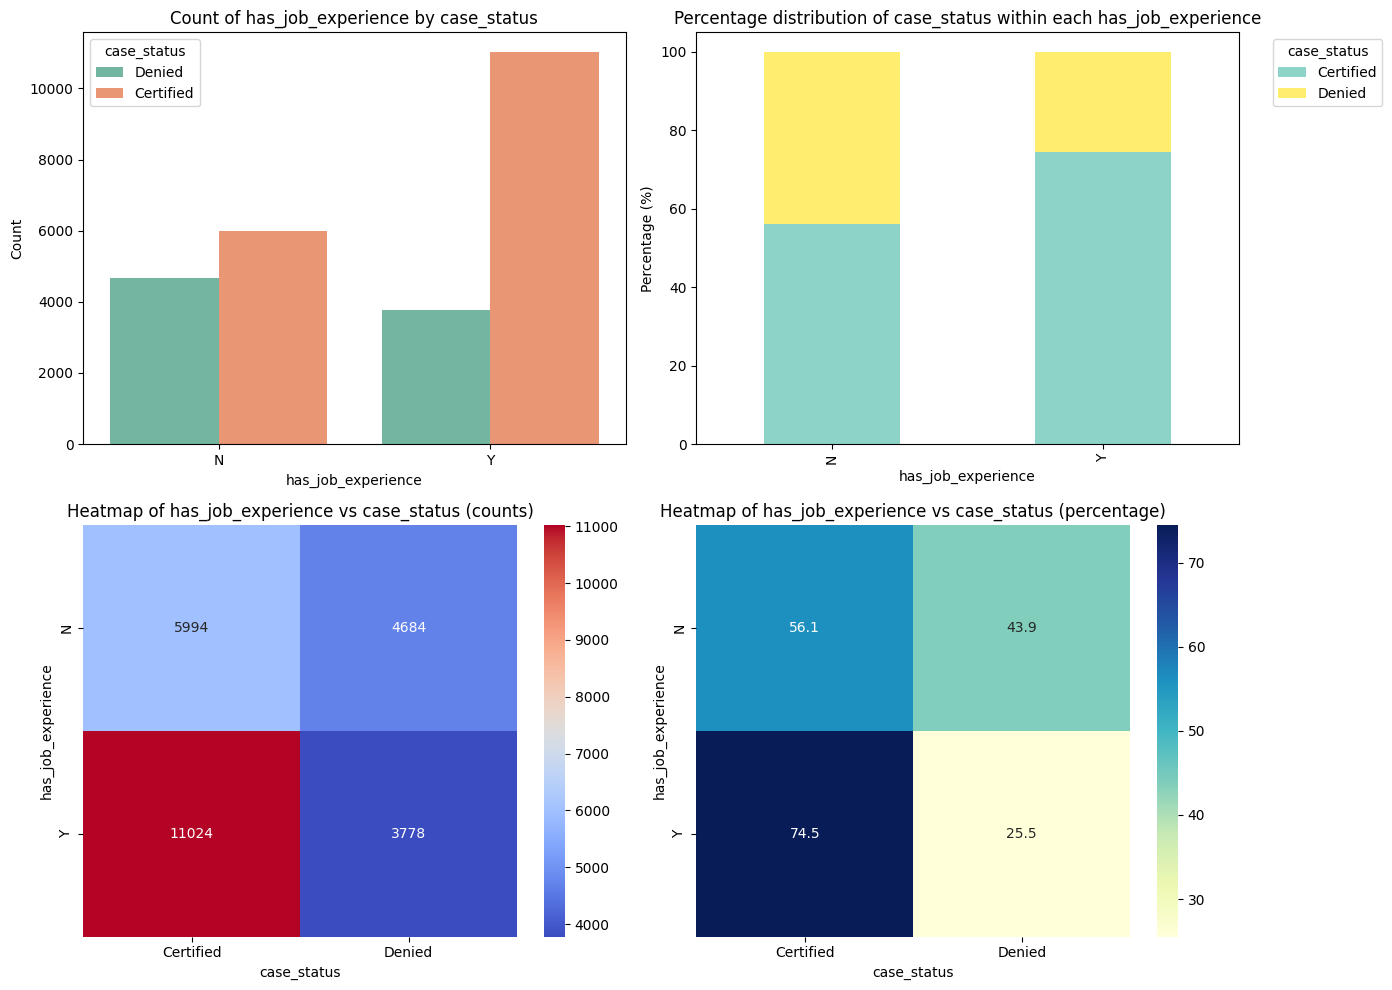

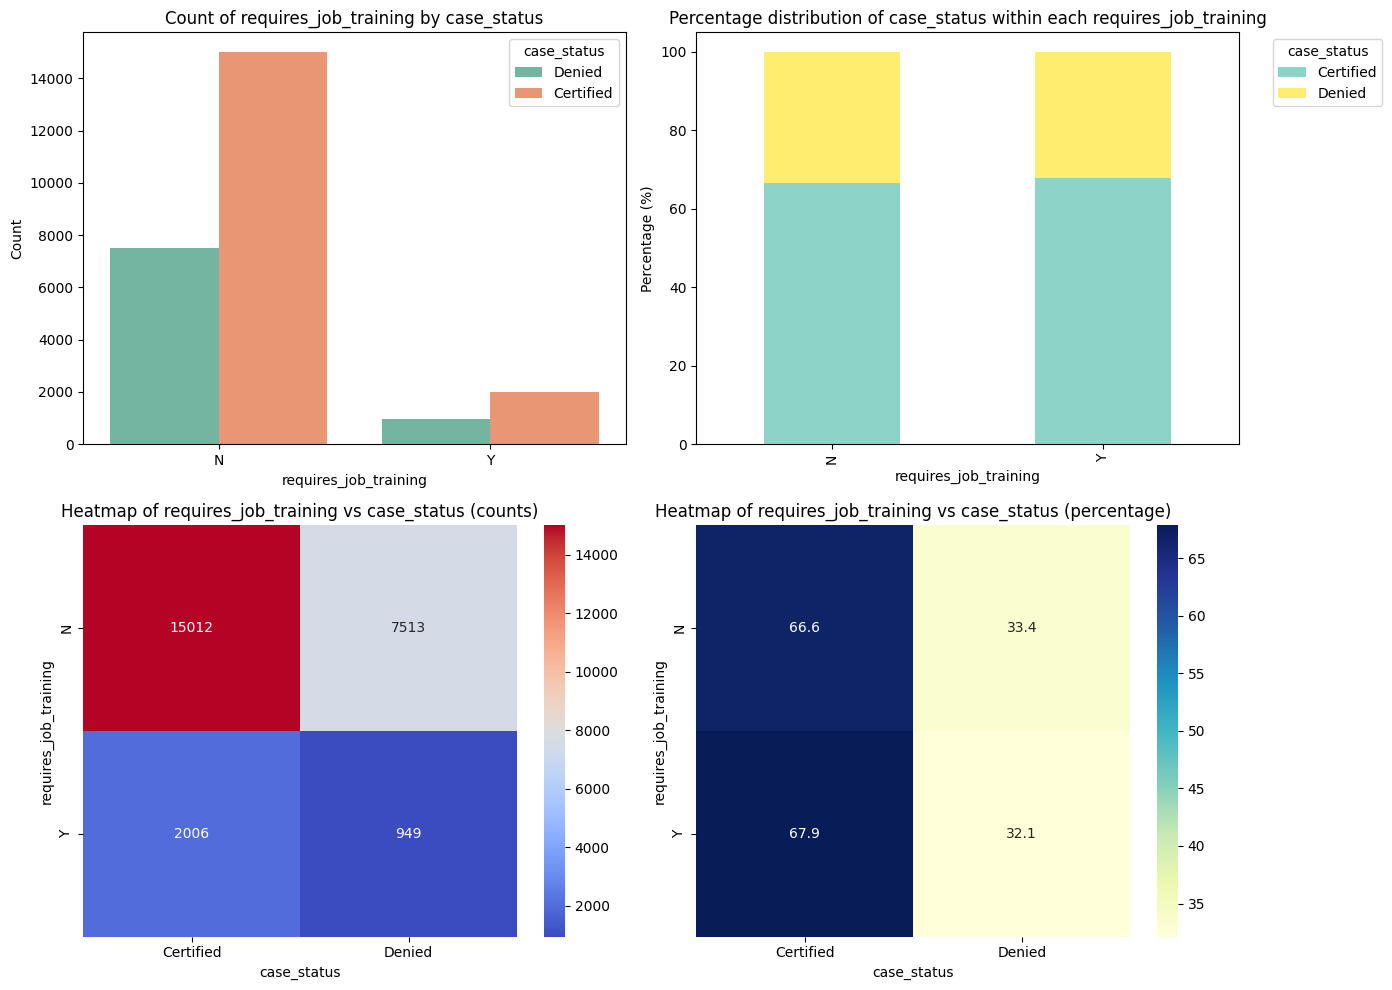

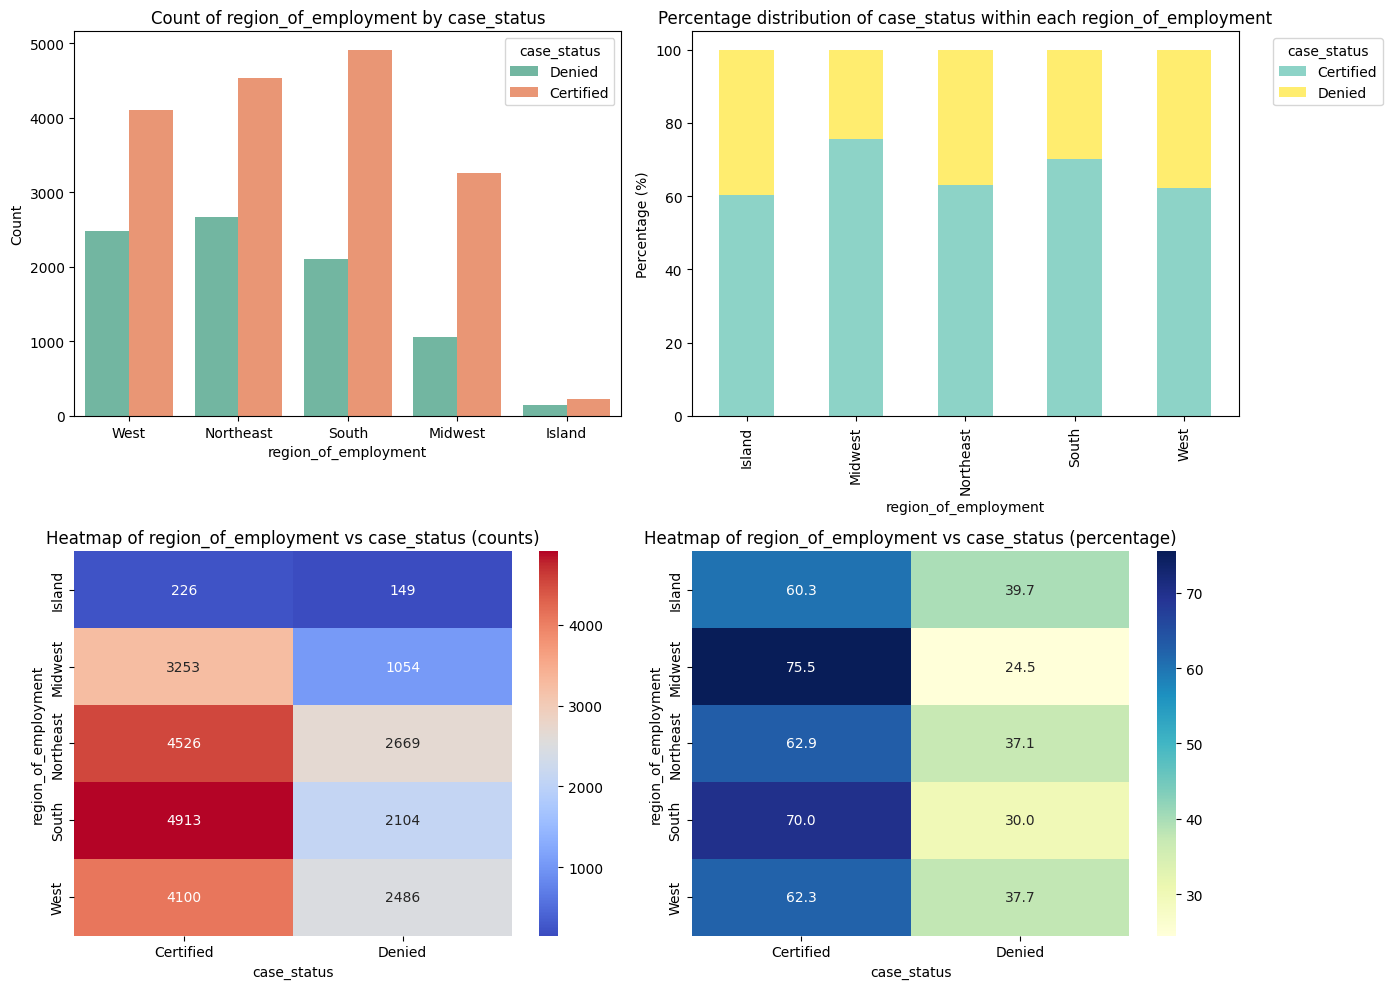

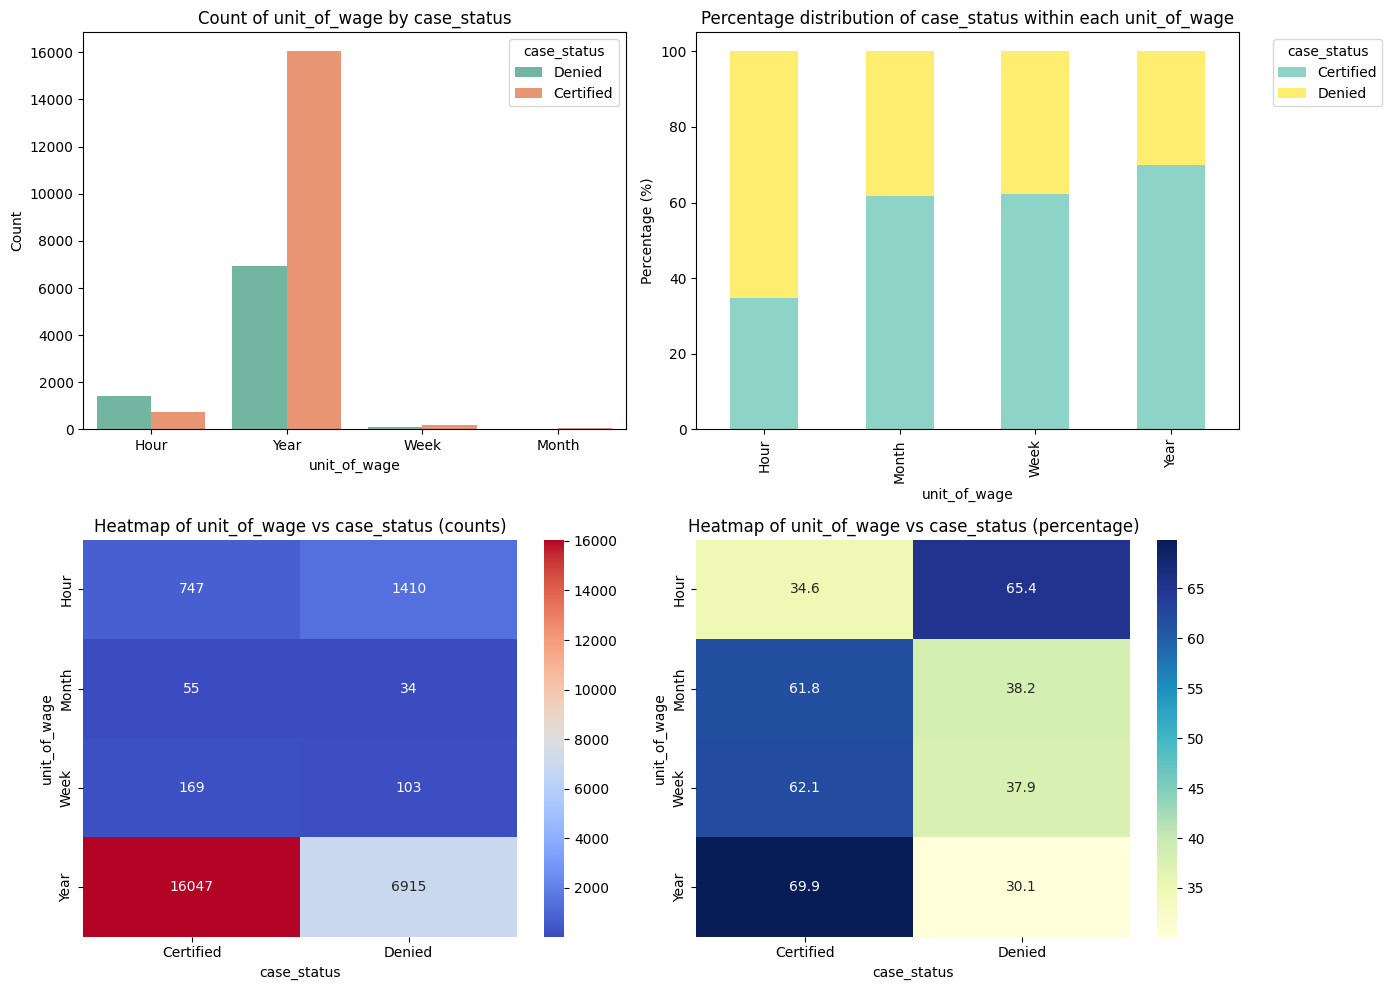

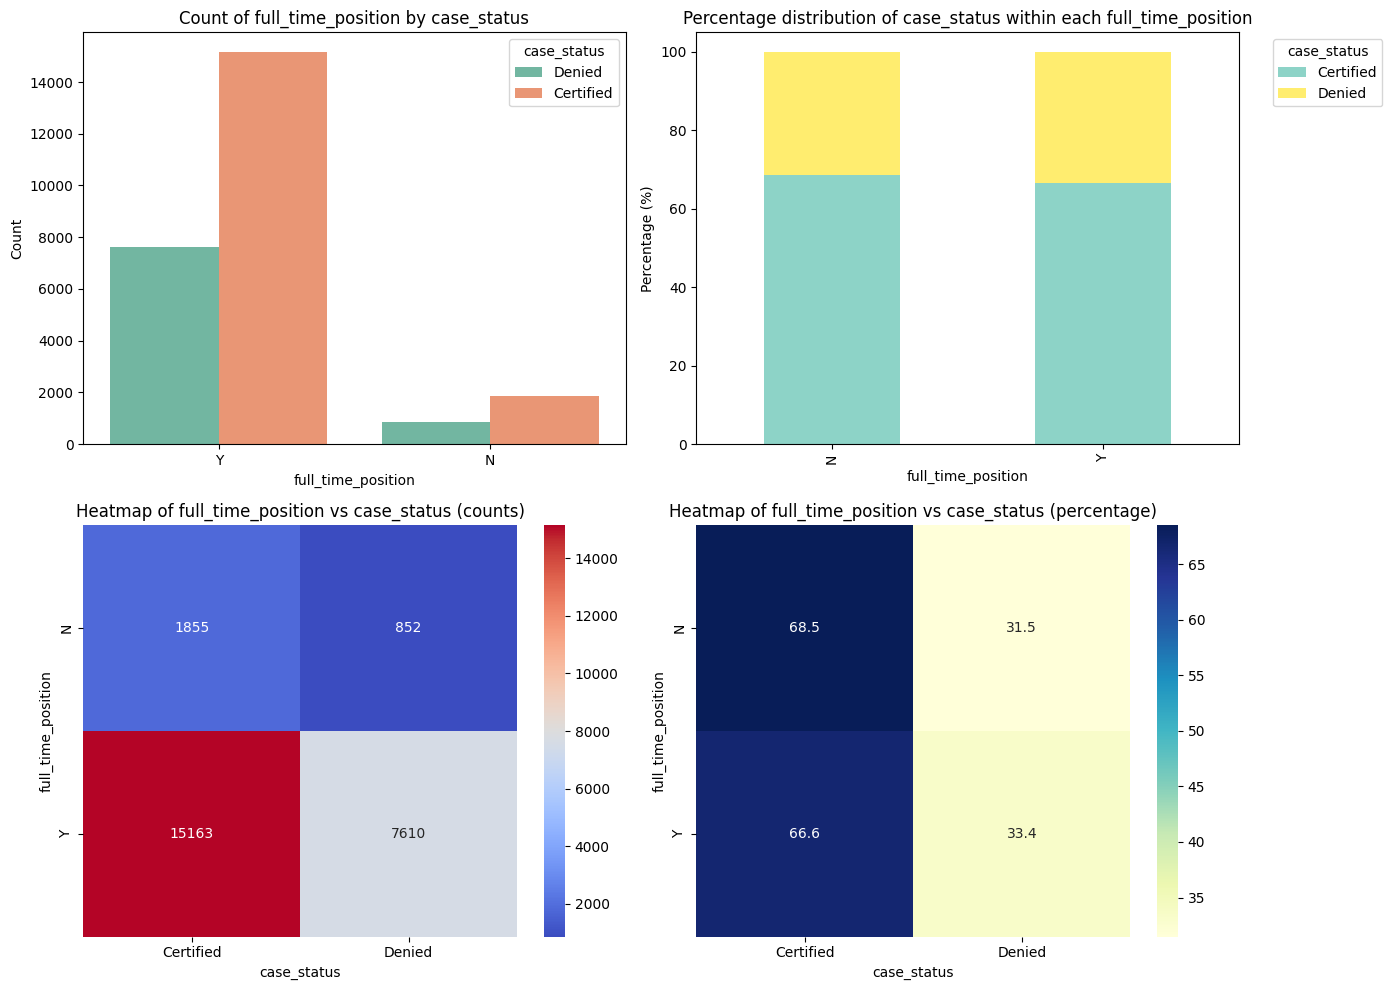

C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_1556\516148387.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target)


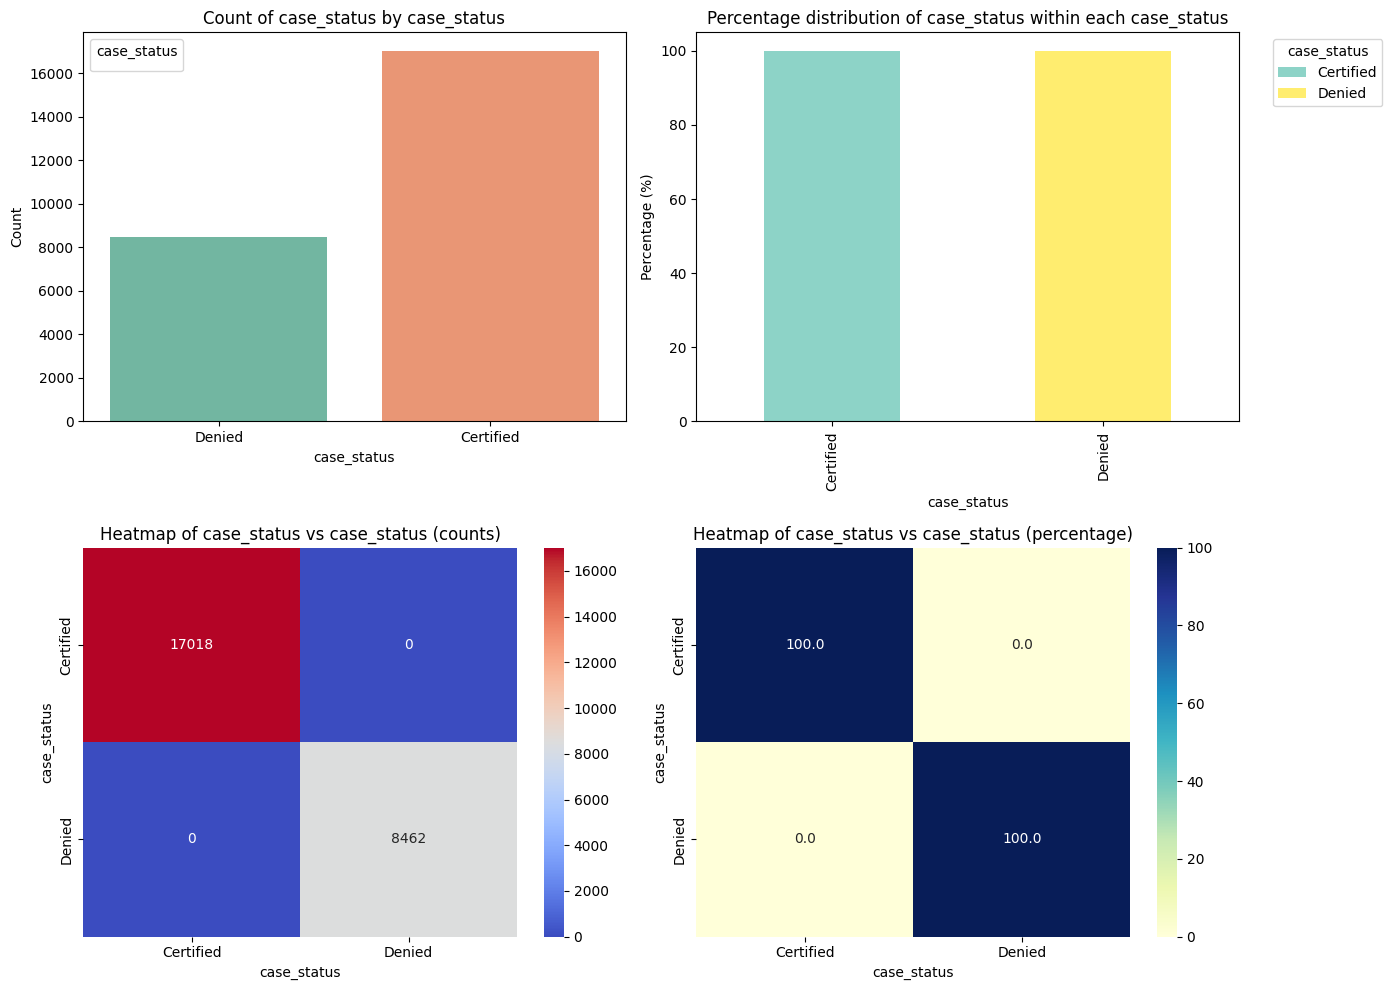

In [80]:
for col in cat_cols:
    categorical_plot_wrt_target(df_visa, col, "case_status")

**Insight from Histogram and Boxplot Visualizations**

**1. No_of_Employees:**

- The distribution is strongly right skewed, the higher concentration of employees is slightly above 5000.

- **Outliers**: There are outliers on the higher end (above 7,000) which may significantly depend on the dataset context.

- **Action**: Consider using Log-Transformation

**2. Year of Establishment:**
- **Distribution**: The distribution is left-skewd, the higher concentration of establishment is below the 1940's.

- **Outliers**: The boxplot shows several outliers below the lower bond which could represent disparity in the year of establishment.

- **Action**:
You may consider applying a log transformation to make the distribution more symmetrical, which could improve model performance, especially for algorithms sensitive to skewness.
Evaluate if the outliers are valid or if they should be capped (using techniques like winsorization) or treated differently to reduce their impact on model training.

**3. Prevailing wage**
 - **Prevailing wage** is moderatley skewed, this could be has a result of the wages paid per year.

 - **Outliers:** the boxplot shows several outliers above the upper bound which could show disparity in the wages paid.

- **Action:**
You may consider applying a log transformation to make the distribution more symmetrical, which could improve model performance, especially for algorithms sensitive to skewness.
Evaluate if the outliers are valid or if they should be capped (using techniques like winsorization) or treated differently to reduce their impact on model training.

**4. Class Balance:**
- The class is imbalanced, consider using `SMOTE`, `Class weighting`,`Oversampling` or `Undersampling`